<a href="https://colab.research.google.com/github/dajebbar/Diabetes-Classification/blob/main/Dabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply Different Classification Algorithms to predict the Diabetes

## Description
The objective is to predict whether the patient has diabetes or not. The dataset consists of several medical predictor (Independent variables) and one target variable.

Dataset url : https://data.world/anaozp/diabetes

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Load the dataset

In [2]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis(EDA)

In [3]:
diabetes_df.shape

(768, 9)

The diabetes dataset contains 786 rows and 9 columns

- Check columns name

In [4]:
diabetes_df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

- Check the columns types

In [5]:
diabetes_df.dtypes.value_counts(dropna=False)

int64      7
float64    2
dtype: int64

All columns are numeric

- Check dataset info

In [6]:
diabetes_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We remark that dataset does not contain missing values but the type of columns take more space memory. Let's fix this.

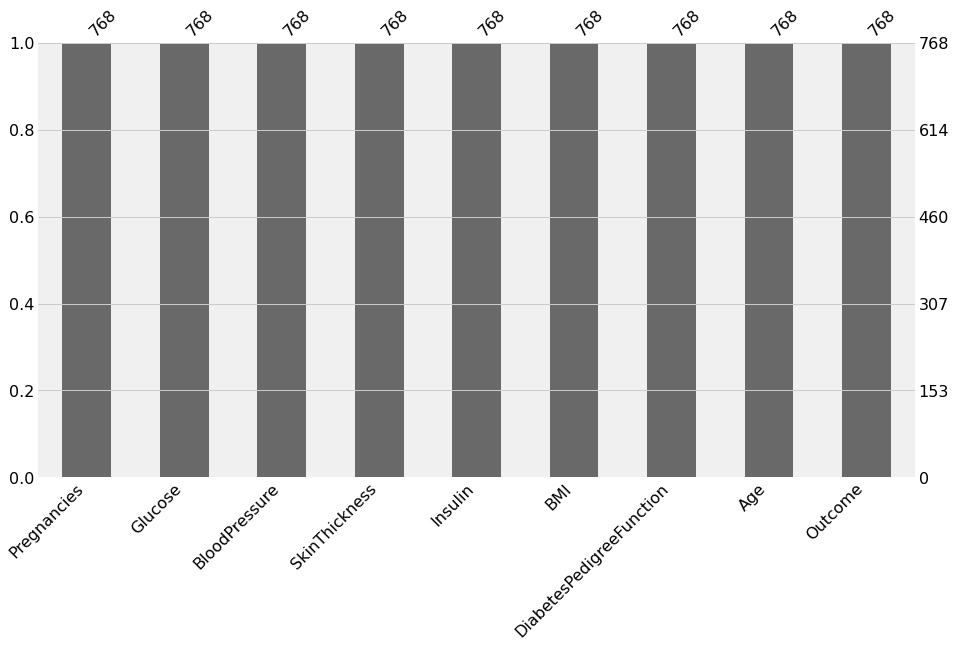

In [7]:
msno.bar(df=diabetes_df, figsize=(14,8))

In [8]:
diabetes_df = diabetes_df.assign(
    Pregnancies = diabetes_df.Pregnancies.astype(np.int8),
    Glucose = diabetes_df.Glucose.astype(np.int8),
    BloodPressure = diabetes_df.BloodPressure.astype(np.int8),
    SkinThickness = diabetes_df.SkinThickness.astype(np.int8),
    Insulin = diabetes_df.Insulin.astype(np.int8),
    BMI = diabetes_df.BMI.astype(np.float16),
    DiabetesPedigreeFunction = diabetes_df.DiabetesPedigreeFunction.astype(np.float16),
    Age = diabetes_df.Age.astype(np.int8),
    Outcome = diabetes_df.Outcome.astype(np.int8),
)

diabetes_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int8   
 1   Glucose                   768 non-null    int8   
 2   BloodPressure             768 non-null    int8   
 3   SkinThickness             768 non-null    int8   
 4   Insulin                   768 non-null    int8   
 5   BMI                       768 non-null    float16
 6   DiabetesPedigreeFunction  768 non-null    float16
 7   Age                       768 non-null    int8   
 8   Outcome                   768 non-null    int8   
dtypes: float16(2), int8(7)
memory usage: 8.4 KB


## Statictical Summary

In [9]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.0,26.561198,99.859361,-128.000000,-93.000000,89.000000,108.000000,127.000000
BloodPressure,768.0,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.0,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.0,7.466146,58.222398,-128.000000,0.000000,0.000000,45.250000,127.000000
BMI,768.0,32.000000,7.882812,0.000000,27.296875,32.000000,36.593750,67.125000
DiabetesPedigreeFunction,768.0,0.471924,0.331299,0.078003,0.243774,0.372559,0.626221,2.419922
Age,768.0,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


We can observe that blood pressure, BMI and skin thickness minimum values does not fill in the adequat range since the minimum skin thickness should be 2mm and minimum blood pressure $<$140/90 mm Hg and $<$130/80 mm Hg for patients with diabetes and BMI $>$ 18. Also Glucose and Insulin minimum values fill in negative range.

## Data Cleaning


- Check for duplicates

In [10]:
diabetes_df.duplicated().any()

False

There are no duplicates in diabetes dataset

- Check Null values

In [11]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As mentioned before there are no missing values

- Check the total of zeros in each feature

In [12]:
def zero_check(df):
  features_list = df.columns[:-1].tolist()
  for feature in features_list:
    print(f'No of zeros in {feature} : {df[df[feature] <= 0].shape[0]}')
    print()

In [13]:
zero_check(diabetes_df)

No of zeros in Pregnancies : 111

No of zeros in Glucose : 288

No of zeros in BloodPressure : 35

No of zeros in SkinThickness : 227

No of zeros in Insulin : 527

No of zeros in BMI : 11

No of zeros in DiabetesPedigreeFunction : 0

No of zeros in Age : 0



Before replacing the zeros let's look at the histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5edd214490>,
      dtype=object)

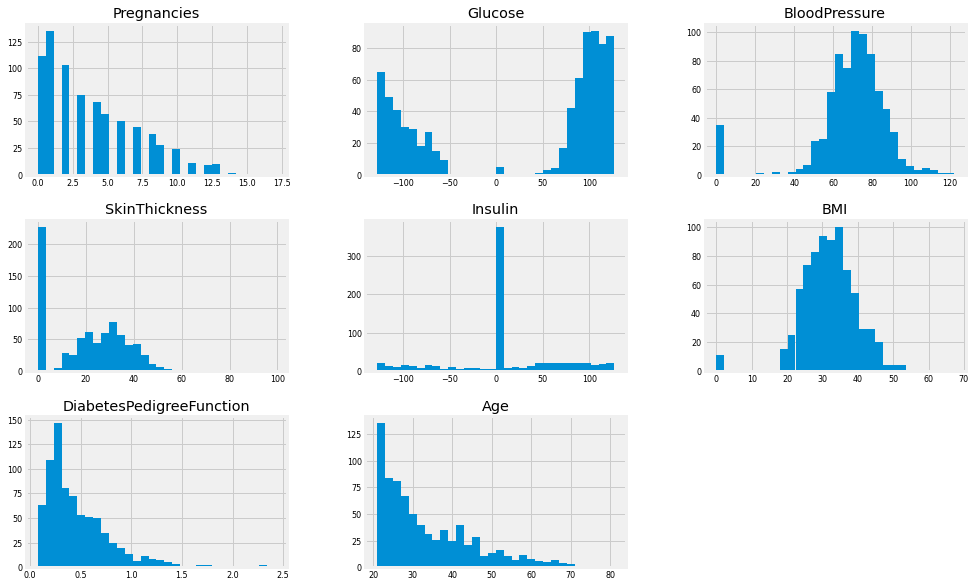

In [14]:
diabetes_df.iloc[:, :-1].hist(figsize=(15, 10), bins=30, xlabelsize=8, ylabelsize=8)

We note that is preferable to replace zeros with mean of each feature

In [15]:
def zero_to_mean(df):
  list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
  for item in list:
    df[item] = np.where(df[item] < 0, 0, df[item])
    print(f'{item} mean: {df[item].mean()}')
    df[item] = df[item].replace(0, df[item].mean())

In [16]:
zero_to_mean(diabetes_df)
print()
zero_check(diabetes_df)

Glucose mean: 64.01692708333333
BloodPressure mean: 69.10546875
SkinThickness mean: 20.536458333333332
Insulin mean: 23.03125
BMI mean: 32.0

No of zeros in Pregnancies : 111

No of zeros in Glucose : 0

No of zeros in BloodPressure : 0

No of zeros in SkinThickness : 0

No of zeros in Insulin : 0

No of zeros in BMI : 0

No of zeros in DiabetesPedigreeFunction : 0

No of zeros in Age : 0



In [17]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.0,88.023275,22.273594,44.000000,64.016927,89.000000,108.000000,127.000000
BloodPressure,768.0,72.254807,12.115932,24.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,768.0,26.606479,9.631241,7.000000,20.536458,23.000000,32.000000,99.000000
Insulin,768.0,38.835246,29.079168,2.000000,23.031250,23.031250,45.250000,127.000000
BMI,768.0,32.468750,6.875000,18.203125,27.500000,32.000000,36.593750,67.125000
DiabetesPedigreeFunction,768.0,0.471924,0.331299,0.078003,0.243774,0.372559,0.626221,2.419922
Age,768.0,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5edcd7a910>,
      dtype=object)

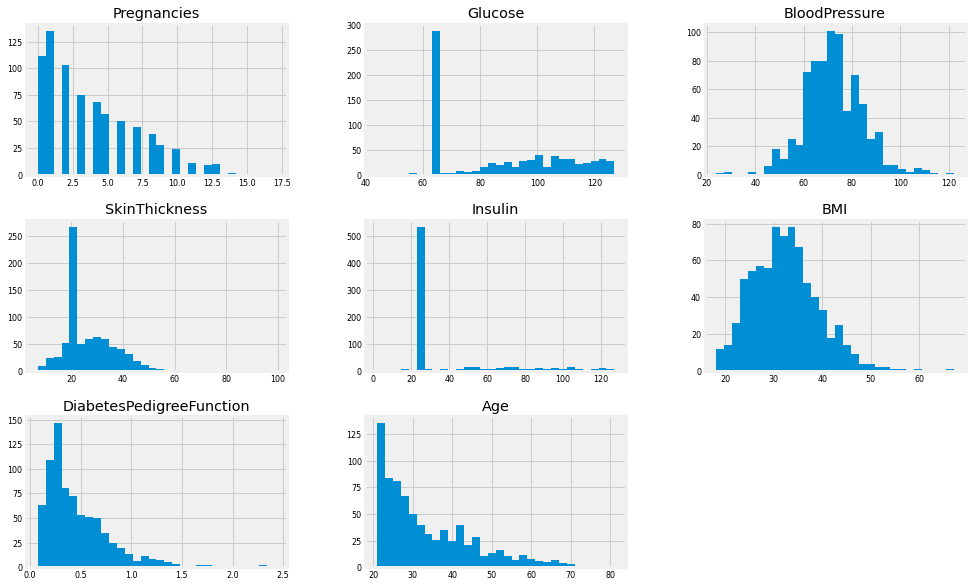

In [18]:
diabetes_df.iloc[:, :-1].hist(figsize=(15, 10), bins=30, xlabelsize=8, ylabelsize=8)

## Visualization

### Distribution


In [22]:
diabetes_df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,64.016927,70.0,20.536458,23.03125,32.0,0.253906,22.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.258057,NaN,NaN


In [23]:
diabetes_df.median()

Pregnancies                  3.000000
Glucose                     89.000000
BloodPressure               72.000000
SkinThickness               23.000000
Insulin                     23.031250
BMI                         32.000000
DiabetesPedigreeFunction     0.372559
Age                         29.000000
Outcome                      0.000000
dtype: float64

### Outliers detection